In [1]:
import pandas as pd

column_names = ['datetime', 'pH']  
ph_dataset = pd.read_csv('cyano_culture_datasets/04-25-2025 culture/ph_log_2025-04-25_12-45-58.csv', header=None, names=column_names)
ph_dataset['unixtime'] = pd.to_datetime(ph_dataset['datetime']).astype('int64') // 10**9

In [4]:
column_names = ['datetime', 'dO'] 
do_dataset_1 = pd.read_csv('cyano_culture_datasets/04-25-2025 culture/do_log_2025-04-25_12-46-01.csv', header=None, names=column_names)
do_dataset_1['unixtime'] = pd.to_datetime(do_dataset_1['datetime']).astype('int64') // 10**9

do_dataset_2 = pd.read_csv('cyano_culture_datasets/04-25-2025 culture/do_log_2025-05-01_15-28-03.csv', header=None, names=column_names)
do_dataset_2['unixtime'] = pd.to_datetime(do_dataset_2['datetime']).astype('int64') // 10**9

merged = pd.merge(do_dataset_1, do_dataset_2, on='unixtime', how='outer', suffixes=('_1', '_2'))
merged['datetime'] = merged['datetime_1'].combine_first(merged['datetime_2'])
merged['dissolved Oxygen'] = merged['dO_1'].combine_first(merged['dO_2'])
merged_do_dataset = merged[['unixtime', 'datetime', 'dissolved Oxygen']]

In [14]:
column_names = ['datetime', 'temperature (C)']
temp_dataset = pd.read_csv('cyano_culture_datasets/04-25-2025 culture/temperature_log_2025-04-25_12-45-52.csv', header=None, names=column_names)
temp_dataset['unixtime'] = pd.to_datetime(temp_dataset['datetime']).astype('int64') // 10**9

In [15]:
column_names = ['datetime', 'red_intensity', 'blue_intensity', 'green_intensity', 'color_combined']  
color_dataset = pd.read_csv('cyano_culture_datasets/04-25-2025 culture/color_log_2025-04-25_12-45-43.txt', header=None, names=column_names)
color_dataset['unixtime'] = pd.to_datetime(color_dataset['datetime']).astype('int64') // 10**9

In [18]:
df_combined = pd.merge(
    merged_do_dataset, ph_dataset, on="unixtime", how="outer", suffixes=("_do", "_ph")
)
df_combined = pd.merge(df_combined, temp_dataset, on="unixtime", how="outer")
df_combined = pd.merge(df_combined, color_dataset, on="unixtime", how="outer")

df_combined = df_combined.sort_values(by="unixtime").reset_index(drop=True)
df_combined["datetime"] = (
    df_combined["datetime_do"]
    .combine_first(df_combined["datetime_ph"])
    .combine_first(df_combined["datetime_x"])
    .combine_first(df_combined["datetime_y"])
)

df_combined = df_combined.drop(
    columns=["datetime_do", "datetime_ph", "datetime_x", "datetime_y"]
)
desired_order = [
    'unixtime', 'datetime', 'temperature (C)', 'pH', 'dissolved Oxygen',
    'red_intensity', 'green_intensity', 'blue_intensity', 'color_combined'
]

df_combined = df_combined[desired_order]
df_combined

,unixtime,datetime,temperature (C),pH,dissolved Oxygen,red_intensity,green_intensity,blue_intensity,color_combined
0,1745585154,2025-04-25 12:45:54.357626,27.89,NaN,NaN,NaN,NaN,NaN,NaN
1,1745585155,2025-04-25 12:45:55.343723,27.89,NaN,NaN,NaN,NaN,NaN,NaN
2,1745585156,2025-04-25 12:45:56.333909,27.89,NaN,NaN,NaN,NaN,NaN,NaN
3,1745585157,2025-04-25 12:45:57.324312,27.89,NaN,NaN,NaN,NaN,NaN,NaN
4,1745585158,2025-04-25 12:45:58.312296,27.89,NaN,NaN,22876.0,11389.0,16511.0,47314.0
...,...,...,...,...,...,...,...,...,...
544954,1746113332,2025-05-01 15:28:52.045289,NaN,NaN,5.74,NaN,NaN,NaN,NaN
544955,1746113333,2025-05-01 15:28:53.032330,NaN,NaN,5.74,NaN,NaN,NaN,NaN
544956,1746113334,2025-05-01 15:28:54.017664,NaN,NaN,5.74,NaN,NaN,NaN,NaN
544957,1746113335,2025-05-01 15:28:55.004149,NaN,NaN,5.74,NaN,NaN,NaN,NaN


In [ ]:
# ADDING A FILTER FOR THE TIME RANGE
# start_time = 1744741273  # Replace with your start time in Unix time
# end_time = 1745406765  # Replace with your end time in Unix time
# df_combined = df_combined[
#     (df_combined["unixtime"] >= start_time) & (df_combined["unixtime"] <= end_time)
# ]

In [19]:
# Convert the datetime column to actual datetime objects
df_combined['datetime'] = pd.to_datetime(df_combined['datetime'])

# Function to calculate light intensity
def get_light_intensity(dt):
    dt = pd.to_datetime(dt)
    hour = dt.hour
    return 120 if 8 <= hour < 20 else 0

# Apply function to create new column
df_combined['light intensity (μmol photons m² s⁻¹)'] = df_combined['datetime'].apply(get_light_intensity)
df_combined


,unixtime,datetime,temperature (C),pH,dissolved Oxygen,red_intensity,green_intensity,blue_intensity,color_combined,light intensity (μmol photons m² s⁻¹)
0,1745585154,2025-04-25 12:45:54.357626,27.89,NaN,NaN,NaN,NaN,NaN,NaN,120
1,1745585155,2025-04-25 12:45:55.343723,27.89,NaN,NaN,NaN,NaN,NaN,NaN,120
2,1745585156,2025-04-25 12:45:56.333909,27.89,NaN,NaN,NaN,NaN,NaN,NaN,120
3,1745585157,2025-04-25 12:45:57.324312,27.89,NaN,NaN,NaN,NaN,NaN,NaN,120
4,1745585158,2025-04-25 12:45:58.312296,27.89,NaN,NaN,22876.0,11389.0,16511.0,47314.0,120
...,...,...,...,...,...,...,...,...,...,...
544954,1746113332,2025-05-01 15:28:52.045289,NaN,NaN,5.74,NaN,NaN,NaN,NaN,120
544955,1746113333,2025-05-01 15:28:53.032330,NaN,NaN,5.74,NaN,NaN,NaN,NaN,120
544956,1746113334,2025-05-01 15:28:54.017664,NaN,NaN,5.74,NaN,NaN,NaN,NaN,120
544957,1746113335,2025-05-01 15:28:55.004149,NaN,NaN,5.74,NaN,NaN,NaN,NaN,120


In [8]:
df_combined = df_combined[: -1480] # take off the final bit where the dissolved Oxygne spikes

In [ ]:
df_combined.to_csv(
    'cyano_culture_datasets/04-25-2025 culture/combined_dataset.csv',
    index=False
)

In [ ]:
df_combined = pd.read_csv('cyano_culture_datasets/04-25-2025 culture/combined_dataset.csv')
I_0 = df_combined['red_intensity'].max()
def calculate_od_from_red_intensity(red_intensity, I0 = I_0):
    if pd.isna(red_intensity):
        return np.nan
    # Replace with your actual formula. For example:
    if red_intensity <= 0: return np.nan
    return -np.log10(red_intensity / I0)


# What's the data look like?

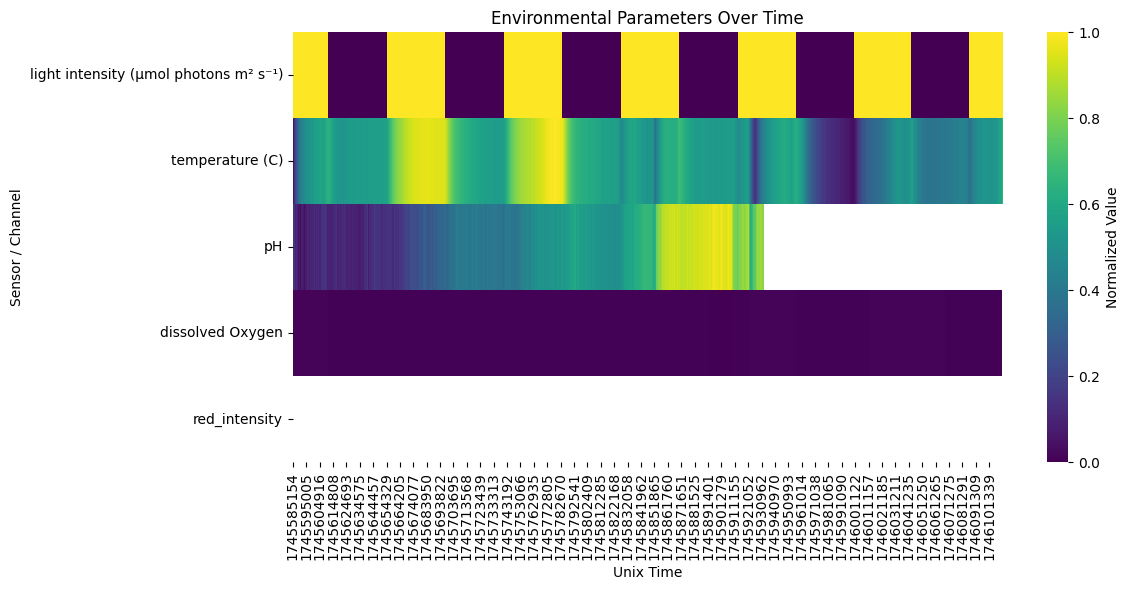

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = df_combined[
    [
        'unixtime',
        'light intensity (μmol photons m² s⁻¹)',
        "temperature (C)",
        "pH",
        "dissolved Oxygen",
        "red_intensity",
        # "green_intensity",
        # "blue_intensity",
    ]
]
heatmap_data = heatmap_data.dropna(how="all")
heatmap_data = heatmap_data.set_index("unixtime")
normalized = (heatmap_data - heatmap_data.min()) / (
    heatmap_data.max() - heatmap_data.min()
)

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(
    normalized.transpose(), cmap="viridis", cbar_kws={"label": "Normalized Value"}
)
plt.xlabel("Unix Time")
plt.ylabel("Sensor / Channel")
plt.title("Environmental Parameters Over Time")
plt.tight_layout()
plt.show()

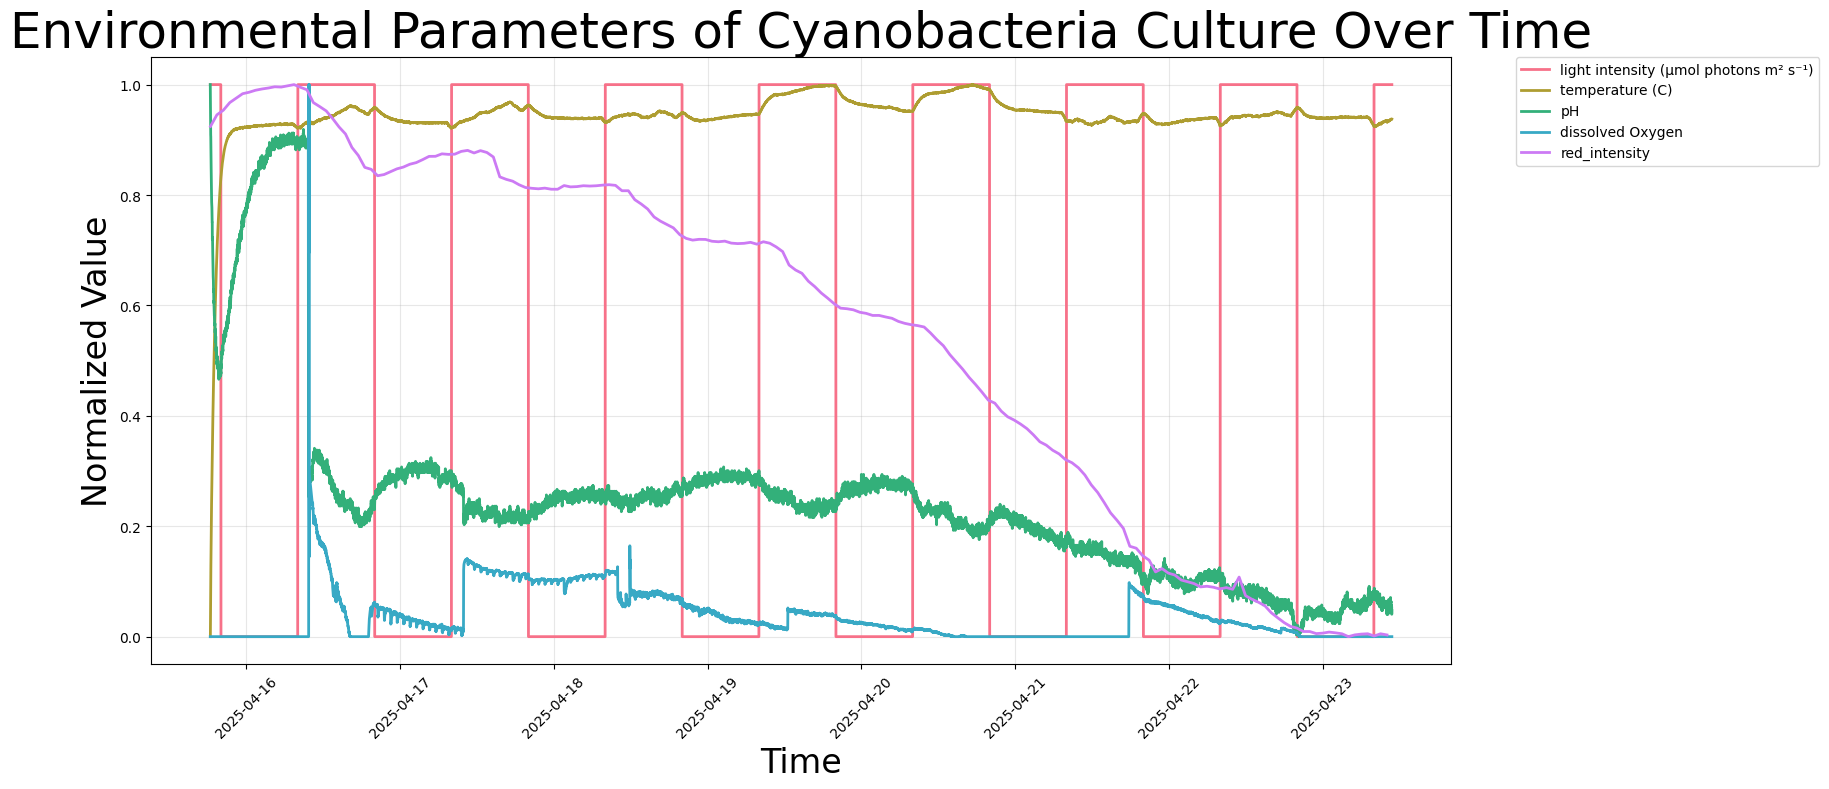

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assume df_combined is already loaded and is a pandas DataFrame
# Example:
# df_combined = pd.read_csv('your_data.csv') # Or however you load your data

# Extract the same data as before
lineplot_data = df_combined[
    [
        'unixtime',
        'light intensity (μmol photons m² s⁻¹)',
        "temperature (C)",
        "pH",
        "dissolved Oxygen",
        "red_intensity",
    ]
]
lineplot_data = lineplot_data.dropna(how="all")
# Convert unixtime to datetime for better x-axis labels
lineplot_data['datetime'] = pd.to_datetime(lineplot_data['unixtime'], unit='s')
lineplot_data = lineplot_data.set_index('datetime')

# --- BEGIN MODIFICATION: Downsample specified columns ---
cols_to_downsample = [
    'light intensity (μmol photons m² s⁻¹)',
    "temperature (C)",
    "pH",
    "dissolved Oxygen",
]

for col in cols_to_downsample:
    if col in lineplot_data.columns:
        # Keep a copy of the original values for the column
        original_values = lineplot_data[col].copy()
        # Create a new series filled with NaNs, preserving original dtype
        downsampled_series = pd.Series(np.nan, index=lineplot_data.index, dtype=original_values.dtype)
        # Assign every 50th value from the original series
        downsampled_series.iloc[::50] = original_values.iloc[::50]
        # Update the column in lineplot_data
        lineplot_data[col] = downsampled_series
    else:
        print(f"Warning: Column '{col}' not found in lineplot_data for downsampling.")
# --- END MODIFICATION ---

# Normalize the data for consistent y-axis scale
# The 'unixtime' column is typically dropped or not used if 'datetime' is the index
data_for_normalization = lineplot_data.copy()
if 'unixtime' in data_for_normalization.columns:
    data_for_normalization = data_for_normalization.drop(columns=['unixtime'])

# Perform normalization
# For downsampled columns, min/max will be calculated on the sparse (non-NaN) data
# For 'red_intensity', min/max will be calculated on the full data
normalized = (data_for_normalization - data_for_normalization.min()) / (
    data_for_normalization.max() - data_for_normalization.min()
)

# Create a better color palette for distinguishing between lines
# The number of columns for the palette remains the same
palette = sns.color_palette("husl", len(normalized.columns))

# Create the plot
plt.figure(figsize=(14, 8))

# Using a Seaborn lineplot for better aesthetics
ax = sns.lineplot(
    data=normalized,
    palette=palette,
    linewidth=2,
    dashes=False, # Lines will connect the sparse points for downsampled data
)

# Add better formatting
plt.xlabel('Time', fontsize=18)
plt.ylabel('Normalized Value', fontsize=18)
plt.title('Environmental Parameters of Cyanobacteria Culture Over Time', fontsize=24)

# Improve x-axis date formatting
plt.xticks(rotation=45)
plt.tight_layout()

# Increase font size for axis ticks
plt.tick_params(axis='both', which='major', labelsize=14)


# Add a legend with better positioning
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.grid(True, alpha=0.3)
plt.show()

In [12]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

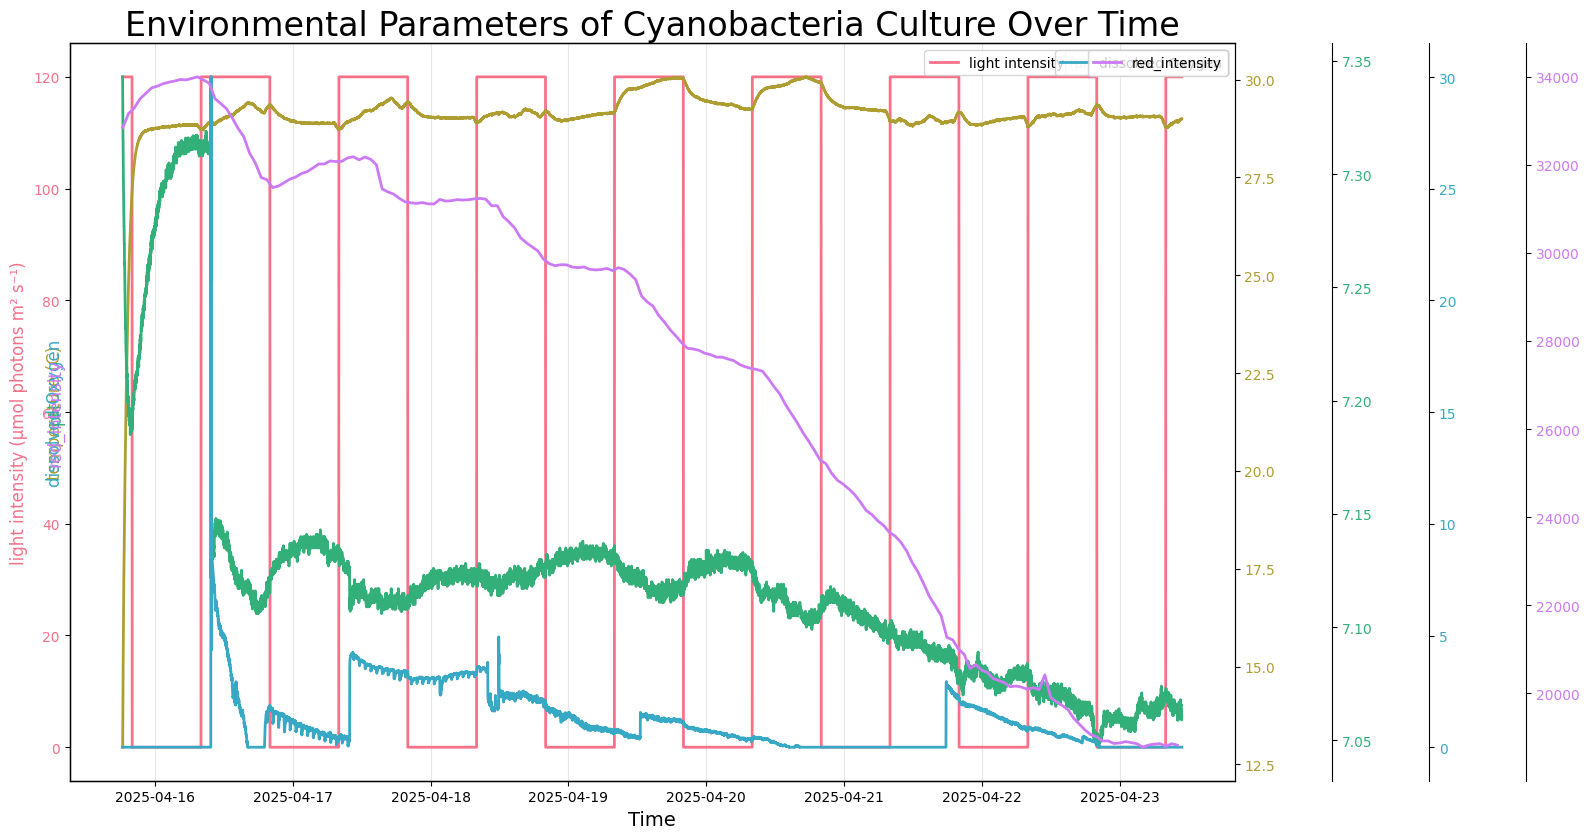

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the relevant data
lineplot_data = df_combined[
    [
        'unixtime',
        'light intensity (μmol photons m² s⁻¹)',
        "temperature (C)",
        "pH",
        "dissolved Oxygen",
        "red_intensity",
    ]
].copy()

cols_to_downsample = [
    'light intensity (μmol photons m² s⁻¹)',
    "temperature (C)",
    "pH",
    "dissolved Oxygen",
]

for col in cols_to_downsample:
    if col in lineplot_data.columns:
        # Keep a copy of the original values for the column
        original_values = lineplot_data[col].copy()
        # Create a new series filled with NaNs, preserving original dtype
        downsampled_series = pd.Series(np.nan, index=lineplot_data.index, dtype=original_values.dtype)
        # Assign every 50th value from the original series
        downsampled_series.iloc[::50] = original_values.iloc[::50]
        # Update the column in lineplot_data
        lineplot_data[col] = downsampled_series
    else:
        print(f"Warning: Column '{col}' not found in lineplot_data for downsampling.")

lineplot_data = lineplot_data.dropna(how="all")

# Convert unixtime to datetime
lineplot_data['datetime'] = pd.to_datetime(lineplot_data['unixtime'], unit='s')
lineplot_data = lineplot_data.set_index('datetime')
lineplot_data = lineplot_data.drop(columns=['unixtime'])

# Create a color palette
columns_to_plot = lineplot_data.columns
palette = sns.color_palette("husl", len(columns_to_plot))

fig, ax1 = plt.subplots(figsize=(16, 10))  # Increased figure size

# Plot the first variable
color = palette[0]
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel(columns_to_plot[0], color=color, fontsize=12)
sns.lineplot(data=lineplot_data[columns_to_plot[0]], ax=ax1, color=color, linewidth=2, label=columns_to_plot[0])
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3, axis='x')

axes = [ax1]
lines = [ax1.get_lines()[0]]

# Plot subsequent variables on new y-axes
for i, column in enumerate(columns_to_plot[1:]):
    ax_new = ax1.twinx()
    axes.append(ax_new)
    color = palette[i+1]

    # Position the new y-axis spine to avoid overlap
    if i == 0:  # Corresponds to the second variable overall
        ax_new.spines["right"].set_position(("outward", 0))
    else:  # For third, fourth, etc. variables
        ax_new.spines["right"].set_position(("outward", (i) * 70))  # 70 points offset for each additional axis

    line = sns.lineplot(data=lineplot_data[column], ax=ax_new, color=color, linewidth=2, label=column)
    lines.append(line.get_lines()[0])

    ax_new.set_ylabel(column, color=color, fontsize=12)
    ax_new.tick_params(axis='y', labelcolor=color)

    # Set y-axis label position to the left for all axes
    ax_new.yaxis.set_label_position('left')

    ax_new.grid(False)  # Turn off grid for these axes to reduce clutter

# Improve x-axis date formatting
plt.xticks(rotation=45, ha="right")

# Add a title
plt.xlabel('Time', fontsize=18)
# plt.ylabel('Normalized Value', fontsize=18)
plt.title('Environmental Parameters of Cyanobacteria Culture Over Time', fontsize=24)

# plt.title('Environmental Parameters Over Time (Original Values)', fontsize=18, pad=20 + (len(columns_to_plot)-1)*5)

# Remove the legend
# fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02 + 0.02 * len(columns_to_plot)), ncol=min(3, len(columns_to_plot)), fancybox=True, shadow=True, fontsize=10)

# Adjust layout to make space for axes and labels
plt.tight_layout(rect=[0, 0, 1, 0.95 - 0.02 * len(columns_to_plot)])

plt.show()


# Fun little exercise to try and look thru only the columns that have complete data for correlation matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Select the columns we're interested in
correlation_data = df_combined[
    [
        "temperature (C)",
        "pH",
        "dO",
        "red_intensity",
        'light_intensity (lumens)',
    ]
]

# Drop rows with any missing values
complete_data = correlation_data.dropna(how="any")
complete_data


,temperature (C),pH,dO,red_intensity,light_intensity (lumens)
417229,13.57,7.334,0.00,32842.0,120
420984,24.84,7.195,0.00,33161.0,120
424749,27.86,7.205,0.00,33288.0,0
428512,28.52,7.227,0.00,33498.0,0
432274,28.68,7.250,0.00,33619.0,0
...,...,...,...,...,...
1094514,29.04,7.065,0.00,18860.0,0
1098272,28.77,7.070,0.00,18798.0,120
1102024,28.85,7.066,0.00,18859.0,120
1105779,28.91,7.061,0.00,18827.0,120


Original shape: (693029, 5), After dropping NAs: (193, 5)


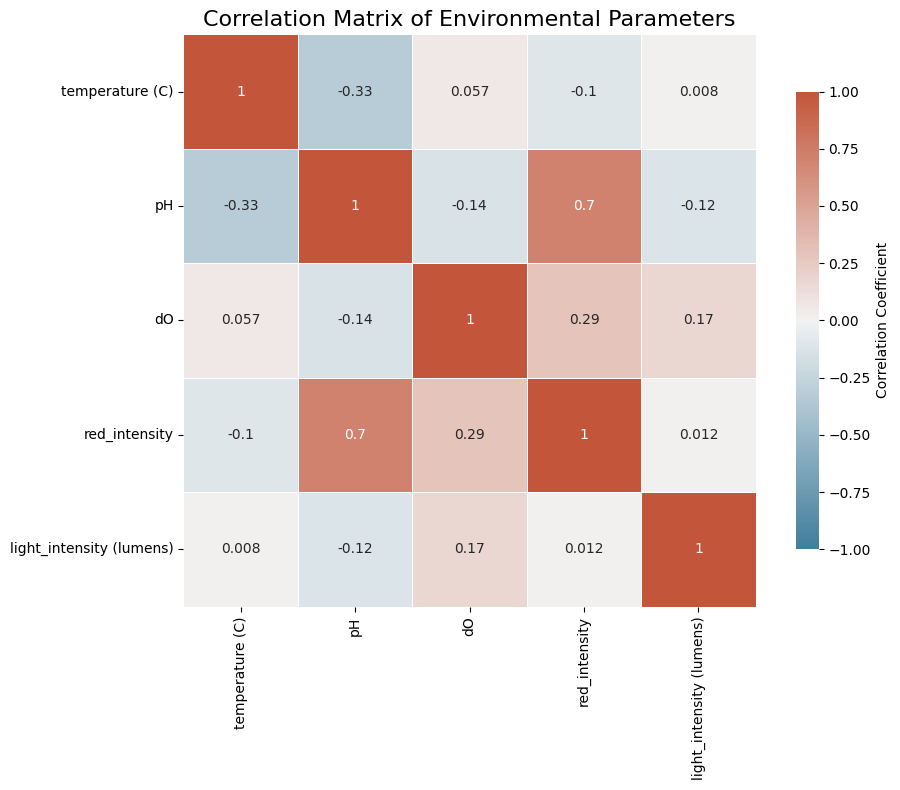


Correlation Matrix:
                          temperature (C)    pH    dO  red_intensity  \
temperature (C)                      1.00 -0.33  0.06          -0.10   
pH                                  -0.33  1.00 -0.14           0.70   
dO                                   0.06 -0.14  1.00           0.29   
red_intensity                       -0.10  0.70  0.29           1.00   
light_intensity (lumens)             0.01 -0.12  0.17           0.01   

                          light_intensity (lumens)  
temperature (C)                               0.01  
pH                                           -0.12  
dO                                            0.17  
red_intensity                                 0.01  
light_intensity (lumens)                      1.00  

Descriptive Statistics:
       temperature (C)          pH          dO  red_intensity  \
count       193.000000  193.000000  193.000000     193.000000   
mean         29.060052    7.123979    1.122953   27245.507772   
std     

<Figure size 1200x1000 with 0 Axes>

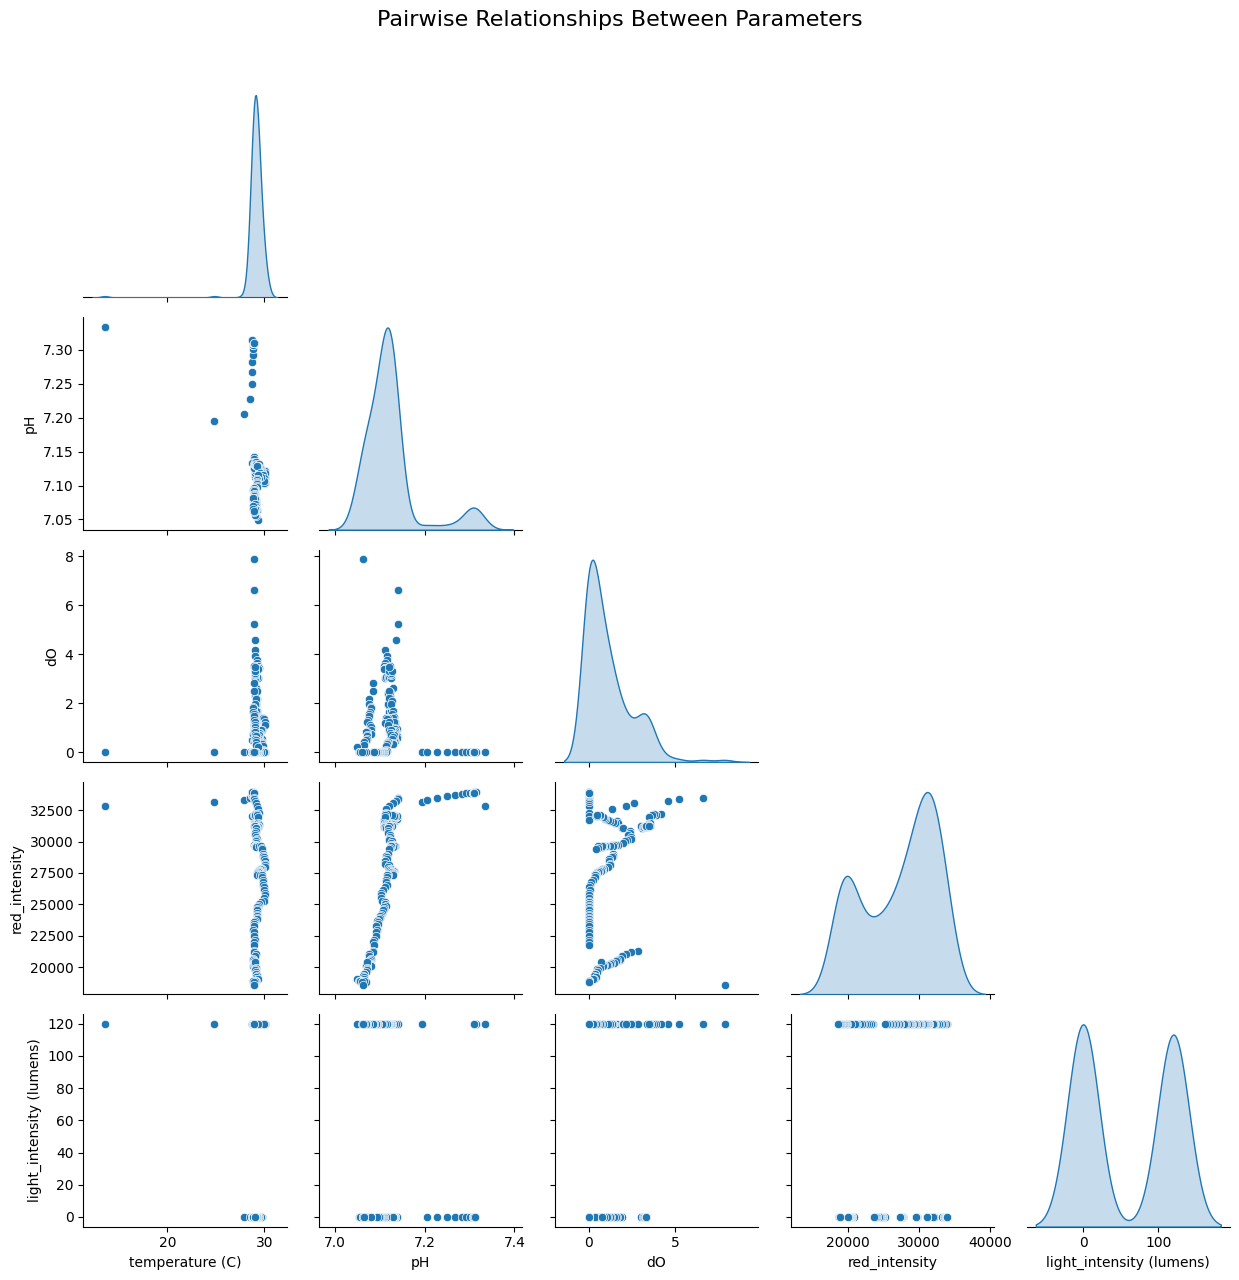

In [ ]:
print(f"Original shape: {correlation_data.shape}, After dropping NAs: {complete_data.shape}")

# Calculate the correlation matrix
corr_matrix = complete_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with formatting
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Create a mask for the upper triangle
cmap = sns.diverging_palette(230, 20, as_cmap=True)  # Use a diverging colormap

# Draw the heatmap
sns.heatmap(
    corr_matrix, 
    annot=True,  # Show correlation values
    cmap=cmap,   # Use our defined colormap
    vmax=1.0,    # Maximum correlation value
    vmin=-1.0,   # Minimum correlation value
    center=0,    # Center the colormap at zero
    square=True, # Make the cells square
    linewidths=.5,
    cbar_kws={"shrink": .8, "label": "Correlation Coefficient"}
)

plt.title('Correlation Matrix of Environmental Parameters', fontsize=16)
plt.tight_layout()
plt.show()

# Let's also look at the actual correlation values
print("\nCorrelation Matrix:")
print(corr_matrix.round(2))

# Additional analysis: descriptive statistics of complete data
print("\nDescriptive Statistics:")
print(complete_data.describe())

# You could also do a pairplot to see both distributions and correlations
plt.figure(figsize=(12, 10))
sns.pairplot(complete_data, diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relationships Between Parameters', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()